In [2]:
# SQL Connection and Querying
import sqlite3

# API Connection
import requests

import pandas as pd

![schema](schema.png)

In [1]:
conn = sqlite3.connect('data/stocks.db')
stocks_2017 = pd.read_sql('''select open,
                      date,
                      name
              FROM open
              JOIN date
              ON open.date_id = date.id
              JOIN company
              ON open.company_id = company.id
              WHERE date BETWEEN date('2017-01-01') and date('2018-01-01')''', conn)

In [123]:
us_holidays = requests.get('https://date.nager.at/Api/v1/Get/US/2017').json()

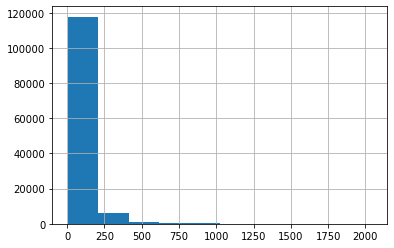

In [126]:
stocks_2017.open.hist();

In [176]:
stocks_2017.date = pd.to_datetime(stocks_2017.date)
holidays = [pd.to_datetime(holiday['date']) for holiday in us_holidays]
def is_holiday(date):
    if date in holidays:
        return 1
    else:
        return 0
    
stocks_2017['is_holiday'] = stocks_2017.date.apply(is_holiday)

In [177]:
stocks_2017.is_holiday.value_counts()

0    124523
1      1508
Name: is_holiday, dtype: int64

In [178]:
import os
os.path.join('data', 'stocks.db')

'data/stocks.db'